In [1]:
questions_to_test = {
    "question1": {
        "complexity": "easy",
        "stakeholder": "Cleaning Manager",
        "task": "Ermittlung Standort Sanitärräume",
        "question": "Auf welchen Stockwerken sind Sanitärräume vorhanden?",
        "expected_answer": "EG, 1.OG, 2.OG, 3.OG, 4.OG, 5.OG, 6.OG, 7.OG, 8.OG",
    },
    "question2": {
        "complexity": "easy",
        "stakeholder": "Cleaning Manager",
        "task": "Ermittlung Bodenbeläge",
        "question": "Welche Bodenbeläge gibt es?",
        "expected_answer": "Stein und Zementböden, Stein und Plattenböden, Kunststoffbelege und Linoleum, Parkett und Korkparkett, unbekannt, Gussasphalt und Gummiböden, Textilboden",
    },
    "question3": {
        "complexity": "medium",
        "stakeholder": "Logistics Manager",
        "task": "Flächenmanagement",
        "question": "Gib mir alle Kühlräume mit der Fläche an.",
        "expected_answer": "Kühlraum 00.631 hat eine Gesamtfläche von 6.299m2, Kühlraum 00.632 hat eine Gesamtfläche von 6.299m2, Kühlraum 00.636 hat eine Gesamtfläche von 5.098m2, Kühlraum 00.637 hat eine Gesamtfläche von 8.075m2, Kühlraum 00.638 hat eine Gesamtfläche von 22m2, Kühlraum 00.645 hat eine Gesamtfläche von 7.234m2.",
    },
    "question4": {
        "complexity": "medium",
        "stakeholder": "Cleaning Manager",
        "task": "Ermittlung Fläche Sanitärräume",
        "question": "Welche Flächen haben die einzelnen Sanitärräume ?",
        "expected_answer": "UG = 0m2, EG. = 118,65m2, 1.OG = 39,14m2, 2.OG = 39,14m2, 3.OG = 39,14m2, 4.OG = 39,14m2, 5.OG = 39,14m2, 6.OG = 39,14m2, 7.OG = 39,14m2, 8.OG = 39,14m2, 9.OG = 0m2",
    },
    "question5": {
        "complexity": "hard",
        "stakeholder": "Quality Manager",
        "task": "Qualitätsmanagement",
        "question": "Welcher Schulungsraum ist Flächenmässig der grösste?",
        "expected_answer": "Der Raum Schulung 00.415 ist mit einer Fläche von 41.473m2 der grösste.",
    },
    "question6": {
        "complexity": "hard",
        "stakeholder": "Quality Manager",
        "task": "Qualitätsmanagement",
        "question": "Welche Räumlichkeiten sind für Schulungen zu verwenden?",
        "expected_answer": "Es gibt den Raum Schulung 00.415, Schulungsraum 01.127 und Schulungsraum 01.535.",
    }
}

# Set Params to test first
# question = "Wie gross ist die Fensterfläche im 2. Obergeschoss?" # This will be overridden by the loop below
schema_provided = True  # Includes or excludes schema of the usable_table_names()
# The prompt used by the LLM
SYSTEM_PROMPT = "You are a helpful facility management assistant. Your task is to answer questions about facility management."

if schema_provided:  # Adding the Schema of the table if set to true
    SYSTEM_PROMPT += """Only use the following tables: {table_info}"""

In [2]:
from langchain_cerebras import ChatCerebras
from dotenv import load_dotenv
import os
# Set up the environment

# Imports for logging
from excel_logger import log_run
from datetime import datetime
from pathlib import Path
import uuid

load_dotenv()

llm = ChatCerebras(
    model="llama-3.3-70b",
    temperature=0.0,
    api_key=os.getenv("CEREBRAS_API_KEY")
)
print(llm.model_name)

llama-3.3-70b


In [3]:
from typing_extensions import TypedDict


class State(TypedDict):
    question: str
    query: str
    result: str
    answer: str

In [4]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage

query_prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", SYSTEM_PROMPT),  # Placeholders fill up a **list** of messages
        ("user", "{input}"),
    ]
)

# tools = [ResponseFormatter]
# langgraph_agent_executor = create_react_agent(llm, tools, prompt=prompt)
# messages = langgraph_agent_executor.invoke(
#     {"messages": [("user", query)]},
# )
# print(messages["messages"][-1])

# model_with_tools = llm.bind_tools(tools, tool_choice='required')
# print(model_with_tools.invoke(query))

In [5]:
from sqlalchemy import create_engine
from langchain.sql_database import SQLDatabase

# DB CONNECTION
# SQLAlchemy Engine
engine = create_engine(
    f"postgresql+psycopg2://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}:5432/{os.getenv('DB_NAME')}")
db = SQLDatabase(engine, schema="public")
db.get_table_info()

C:\Users\Kiril\PycharmProjects\LLM-research\venv\Lib\site-packages\langchain_community\utilities\sql_database.py:338: SAWarning: Cannot correctly sort tables; there are unresolvable cycles between tables "public.contact, public.facility, public.idp_template, public.model, public.project", which is usually caused by mutually dependent foreign key constraints.  Foreign key constraints involving these tables will not be considered; this warning may raise an error in a future release.
  metadata_table_names = [tbl.name for tbl in self._metadata.sorted_tables]
C:\Users\Kiril\PycharmProjects\LLM-research\venv\Lib\site-packages\langchain_community\utilities\sql_database.py:350: SAWarning: Cannot correctly sort tables; there are unresolvable cycles between tables "public.contact, public.facility, public.idp_template, public.model, public.project", which is usually caused by mutually dependent foreign key constraints.  Foreign key constraints involving these tables will not be considered; this 

'\nCREATE TABLE public.acceptance (\n\tid BIGSERIAL NOT NULL, \n\tname VARCHAR(255) NOT NULL, \n\tcreated_on TIMESTAMP WITHOUT TIME ZONE, \n\tcategory VARCHAR(255), \n\tstart_date TIMESTAMP WITHOUT TIME ZONE, \n\tend_date TIMESTAMP WITHOUT TIME ZONE, \n\tresult VARCHAR(255), \n\tdeadline TIMESTAMP WITHOUT TIME ZONE, \n\tlocation VARCHAR(255), \n\tcreated_by_id BIGINT, \n\tcompany_id BIGINT, \n\tsystem_id BIGINT NOT NULL, \n\ttechnical_system_id BIGINT, \n\tfloor_id BIGINT, \n\ttask_id BIGINT, \n\tcreated_by_user VARCHAR(50), \n\tcreated_date TIMESTAMP WITHOUT TIME ZONE DEFAULT now(), \n\tlast_modified_by VARCHAR(50), \n\tlast_modified_date TIMESTAMP WITHOUT TIME ZONE, \n\tjhi_version BIGINT, \n\tdescription_txt TEXT, \n\tcomment_txt TEXT, \n\tsub_project_id BIGINT, \n\tCONSTRAINT pk_acceptance PRIMARY KEY (id), \n\tCONSTRAINT fk_acceptance_company_id FOREIGN KEY(company_id) REFERENCES public.contact (id) ON DELETE SET NULL, \n\tCONSTRAINT fk_acceptance_floor_id FOREIGN KEY(floor_id) RE

In [6]:
from typing_extensions import Annotated


class QueryOutput(TypedDict):
    """Generated SQL query."""

    query: Annotated[str, ..., "Syntactically valid SQL query."]


# def get_table_info_with_schema(db: SQLDatabase) -> str:
#     """Return fully-qualified table and column info with schema."""
#     tables = db.get_usable_table_names()
#     result = []
#     for table in tables:
#         columns = db.get_table_(table)
#         column_info = ", ".join([f"{c.name} ({c.type})" for c in columns])
#         result.append(f"Table public.{table}: {column_info}")
#     return "\n".join(result)

def write_query(state: State):
    """Generate SQL query to fetch information."""
    prompt = query_prompt_template.invoke(
        {
            "dialect": db.dialect,
            "top_k": 10,
            "table_info": db.get_usable_table_names() if schema_provided else None,
            "table_names": [f"public.{name}" for name in db.get_usable_table_names()],
            "input": state["question"],
        }
    )
    structured_llm = llm.with_structured_output(QueryOutput)
    result = structured_llm.invoke(prompt)
    if result is None or not isinstance(result, dict):
        print("⚠️ LLM failed to produce structured output. Trying raw output.")
        print("Raw LLM Output:\n", result)
        raise ValueError("Structured output failed.")

    return {"query": result["query"]}


write_query({"question": "How many asset_component are there?"})

{'query': 'SELECT COUNT(*) FROM asset_component'}

In [7]:
from langchain_community.tools.sql_database.tool import QuerySQLDatabaseTool


def execute_query(state: State):
    """Execute SQL query."""
    execute_query_tool = QuerySQLDatabaseTool(db=db)
    return {"result": execute_query_tool.invoke(state["query"])}


execute_query({"query": "SELECT COUNT(*) FROM public.asset_component"})

{'result': '[(14021,)]'}

In [8]:
def generate_answer(state: State):
    """Answer question using retrieved information as context."""
    prompt = (
        "Given the following user question, corresponding SQL query, "
        "and SQL result, answer the user question.\n\n"
        f'Question: {state["question"]}\n'
        f'SQL Query: {state["query"]}\n'
        f'SQL Result: {state["result"]}'
    )
    response = llm.invoke(prompt)
    return {"answer": response.content}

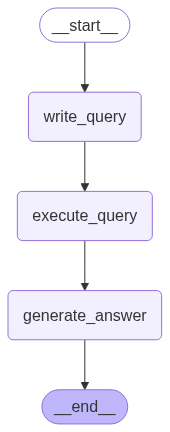

In [9]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence(
    [write_query, execute_query, generate_answer]
)
graph_builder.add_edge(START, "write_query")
graph = graph_builder.compile()

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
# Loop through the questions_to_test dictionary
for question_key, question_data in questions_to_test.items():
    current_question = question_data["question"]
    current_complexity = question_data["complexity"]

    current_run_id = str(uuid.uuid4())
    accumulated_state = {"question": current_question} # Initialize with the current question

    print(f"\n--- Starting Run for: {question_key} ---")
    print(f"Run ID: {current_run_id}")
    print(f"Question: {current_question}")
    print(f"Complexity: {current_complexity}")

    for step_output in graph.stream(
            {"question": current_question}, stream_mode="updates"
    ):
        print("--------------------STREAM OUTPUT--------------------")
        print(step_output) # Print the raw step output
        for node_name, output_value in step_output.items():
            if isinstance(output_value, dict):
                accumulated_state.update(output_value)
            else:
                accumulated_state[node_name] = output_value
        print("----------------ACCUMULATED STATE--------------------")
        print(accumulated_state)

    print("\nGraph execution finished.")
    print(f"Final accumulated state for {question_key}: {accumulated_state}")

    excel_file_path = Path("data/experiment_results.xlsx")
    llm_temperature = getattr(llm, 'temperature', 'N/A')

    row_to_log = {
        "timestamp": datetime.now(),
        "llm_name": llm.model_name if hasattr(llm, 'model_name') else 'N/A',
        "temperature": llm_temperature,
        "system_prompt": SYSTEM_PROMPT,
        "schema_provided": schema_provided,
        "query_complexity": current_complexity,  # Use complexity from the current question
        "question": accumulated_state.get("question", current_question),
        "generated_sql": accumulated_state.get("query"),
        "sql_execution_result": str(accumulated_state.get("result")) if accumulated_state.get("result") is not None else None,
        "answer": accumulated_state.get("answer"),
        "run_id": current_run_id
    }

    print(f"\nLogging data for run {current_run_id} ({question_key}):")
    for key, value in row_to_log.items():
        print(f"  {key}: {value}")

    try:
        log_run(row_dict=row_to_log, excel_path=excel_file_path)
        print(f"Successfully logged run {current_run_id} ({question_key}) to {excel_file_path.resolve()}")
    except Exception as e:
        print(f"Error logging run {current_run_id} ({question_key}): {e}")
    print(f"--- Finished Run for: {question_key} ---")



--- Starting Run for: question1 ---
Run ID: f7d50551-276a-42ae-a601-0d71d66e2dfb
Question: Auf welchen Stockwerken sind Sanitärräume vorhanden?
Complexity: easy
--------------------STREAM OUTPUT--------------------
{'write_query': {'query': "SELECT floor_attributes_aud.floor_id FROM floor_attributes_aud WHERE attribute_name = 'Sanitärräume' AND attribute_value = 'true'"}}
----------------ACCUMULATED STATE--------------------
{'question': 'Auf welchen Stockwerken sind Sanitärräume vorhanden?', 'query': "SELECT floor_attributes_aud.floor_id FROM floor_attributes_aud WHERE attribute_name = 'Sanitärräume' AND attribute_value = 'true'"}
--------------------STREAM OUTPUT--------------------
{'execute_query': {'result': 'Error: (psycopg2.errors.UndefinedColumn) column floor_attributes_aud.floor_id does not exist\nLINE 1: SELECT floor_attributes_aud.floor_id FROM floor_attributes_a...\n               ^\nHINT:  Perhaps you meant to reference the column "floor_attributes_aud.floors_id".\n\n[SQL